# Catatan Sesi 8

In [1]:
# Advanced Visualization 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [9]:
# !conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [15]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_Sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [16]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.shape

(195, 43)

In [23]:
df_can.columns = list(map(str,df_can.columns))
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [17]:
#clean up with drop 
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace= True)
# lets rename
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)
# make all all column
df_can.columns = list(map(str,df_can.columns))
#country to be index
df_can.set_index('Country',inplace=True)
#add total column
df_can['Total'] = df_can.sum(axis=1)
# years that we will be using in this lesson - useful for plotting later on 
years = list(map(str,range(1980,2014)))
print('Data Dimension',df_can.shape)


Data Dimension (195, 38)


C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_12156\1784737420.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Example Map
map(function,iterables)
- fun = fungsi yang di jallan kan 
- iterable urutan, koleksi, atau objek iterator

In [31]:
def myfunc(n):
    return len(n)
x  = map(myfunc,('apple','banana','chery'))
print(list(x))

[5, 6, 5]


In [34]:
def myfunc(a,b):
    return a+b

x = map(myfunc,('apple', 'banana','chery'),('orange','blueprint','bajigur'))
print(list(x))

['appleorange', 'bananablueprint', 'cherybajigur']


In [36]:
df_can.columns = list(map(str,df_can.columns))
print(df_can.columns)
print("-"*100)
print(df_can.index)

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)


In [40]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [39]:
# df_can.set_index('Country', inplace=True)
# print(df_can.index)

KeyError: "None of ['Country'] are in the columns"

# Visualizing Data Using Matplotlib 

In [62]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib Version:', mpl.__version__)

Matplotlib Version: 3.5.1


# Waffle Charts ( Optional )

In [27]:
df_dsn = df_can.loc[['Denmark','Norway','Sweden'], : ]
df_dsn


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


1. Membuat wafle adalah menentukan proporsi setiap kategori sehubungan dangan totalnya

In [29]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]
#print out proportions
for i,proportion in enumerate(category_proportions):
    print(df_dsn.index.values[1] + ':'+str(proportion))

Norway:0.32255663965602777
Norway:0.1924094592359848
Norway:0.48503390110798744


enumerate(iterable,start
- iterable = an iterable object 
- start = a number . defining the start number of the enumerate object default 0

In [41]:
x = ('apple','banana','cherry')
y = enumerate(x)
print(list(y))

[(0, 'apple'), (1, 'banana'), (2, 'cherry')]


2. Ukuran dari waffle chart

In [10]:
width = 40 
height = 10 

total_num_title = width*height
print('Total Number of tiles is', total_num_title)

Total Number of tiles is 400


3. Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing masing kategori 


In [11]:
# Compute each category 
titles_per_category = [round(proportion*total_num_title) for proportion in category_proportions]

# print out number of title per category 
for i, titles in enumerate(titles_per_category):
    print(df_dsn.index.values[i] + ': '+str(titles))

Denmark: 129
Norway: 77
Sweden: 194


4. Membuat matrix yang menyerupai wafel dan mengisinya

In [53]:
#initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))
# define indices to loop through waffle schart 
category_index = 0
tile_index = 0
# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of titles populated for the curent category is equal to 
        if tile_index > sum(titles_per_category[0:category_index]):
            # proceed to the next category 
            category_index += 1
        # set the class value to an integer , ehich increase with class
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [54]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

5. Petakan matrix waffle chart menjadi visual 

C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_12156\4287377068.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

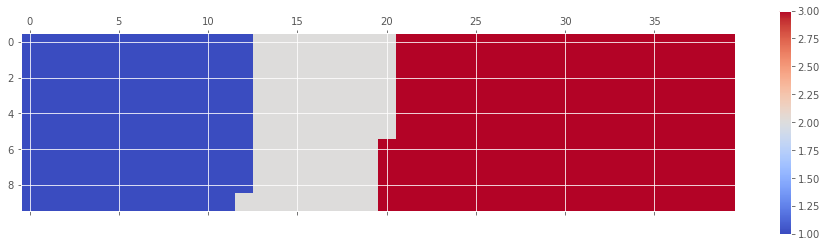

In [59]:
# instantiate a new figure object
fig = plt.figure()
# use matshow to display the waffle chart 
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

6. Percantik

C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_12156\1911454004.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


([], [])

<Figure size 432x288 with 0 Axes>

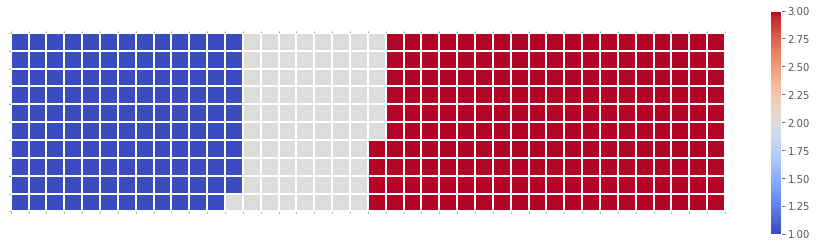

In [56]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# add gridlines
plt.xticks([])
plt.yticks([])

7. Tambahkan legend

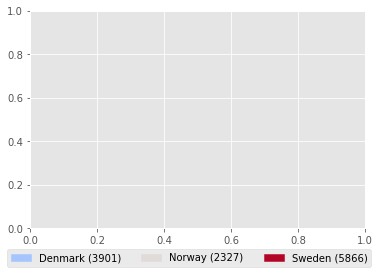

In [66]:

# value cumulative
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart 
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )    

Agar lebih efisien, mari kita gabungkan tujuh langkah ke dalam satu fungsi yang disebut _create_wafflechart. Fungsi ini akan mengambil parameter berikut:

- categories: Unique categories or classes in dataframe
- values: Values corresponding to categories or classes.
- height: Defined height of waffle chart.
- width: Defined width of waffle chart.
- colormap: Colormap class
- value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.




In [67]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 1000
Denmark: 323
Norway: 192
Sweden: 485


C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_12156\3680642677.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

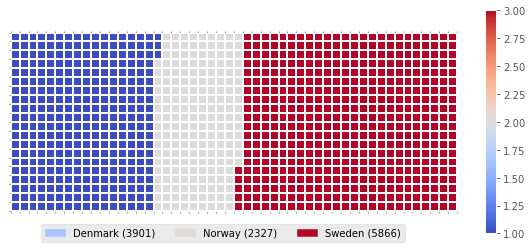

In [69]:
width = 50
height = 20

categories = df_dsn.index.values
values = df_dsn['Total'] 

colormap = plt.cm.coolwarm

create_waffle_chart(categories, values, height, width, colormap)

# Word Cloud

Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

In [70]:
# Install wordcloud
!conda install -c conda-forge wordcloud --yes

# Import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa

In [85]:
# download file and save alice_novel.txt
!wget --quiet
alice_novel.txt = https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt
# import requests
# download_link = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt'
# response = requests.get(download_link)

In [87]:
alice_novel = open('alice_novel.txt', 'r').read()

print('File downlaoded and saved!')

File downlaoded and saved!


In [88]:
alice_novel

'<!DOCTYPE html>\n<!-- saved from url=(0069)https://github.com/ardhiraka/PFDS_sources/blob/master/alice_novel.txt -->\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system" data-turbo-loaded=""><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><style type="text/css">.turbo-progress-bar {\n  position: fixed;\n  display: block;\n  top: 0;\n  left: 0;\n  height: 3px;\n  background: #0076ff;\n  z-index: 2147483647;\n  transition:\n    width 300ms ease-out,\n    opacity 150ms 150ms ease-in;\n  transform: translate3d(0, 0, 0);\n}\n</style>\n    \n  \n  \n  \n  \n  \n  \n\n\n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="./alice_novel_files/light-5178aee0ee76.css"><link crossorigin="anonymous" media="all" rel="stylesheet" href="./alice_novel_files/dark-217d4f9c8e70.css"><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="https://gith

In [105]:
# Menggunakan stopwords dari word_cloud

stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [113]:
# Instantiate a word cloud object

alice_wc = WordCloud(
    background_color='white',
    max_words=20,
    stopwords=stopwords
)

# Generate the word cloud
alice_wc.generate(alice_novel)

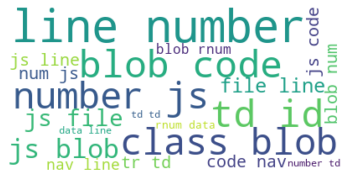

In [114]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

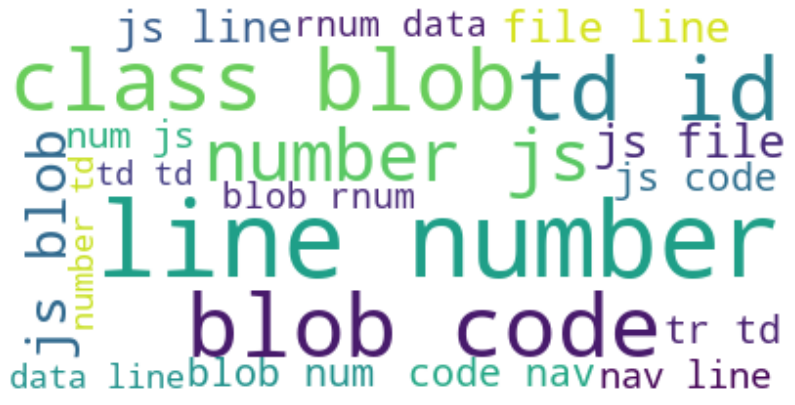

In [118]:
stopwords.add('said') # Add the words said to stopwords

# Re-generate the word cloud
alice_wc.generate(alice_novel)
# Display the cloud
fig = plt.figure()
fig.set_figwidth(14) # Set width
fig.set_figheight(29) # Set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

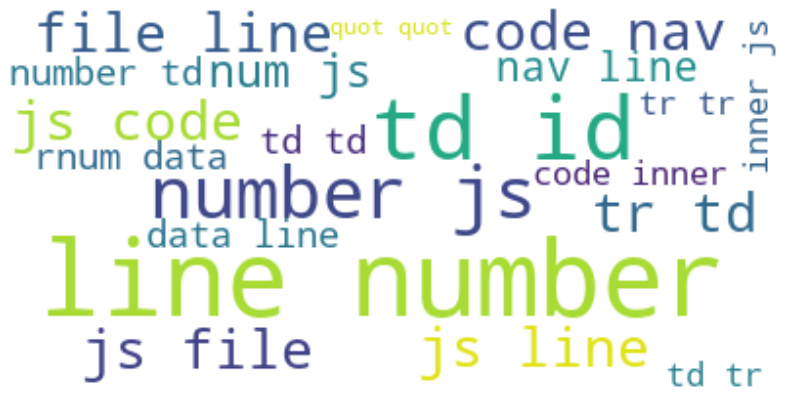

In [119]:
stopwords.update(["class","Dimas","blob"])
# ilangin

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(29) # Set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [120]:
# Melapiskan word_cloud ke dalam mask

alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


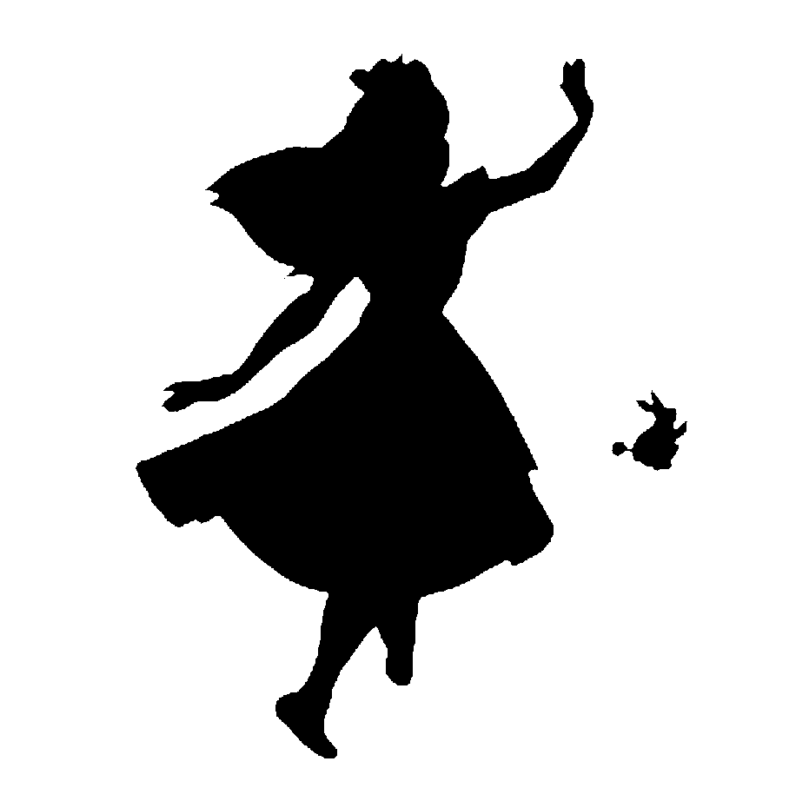

In [95]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

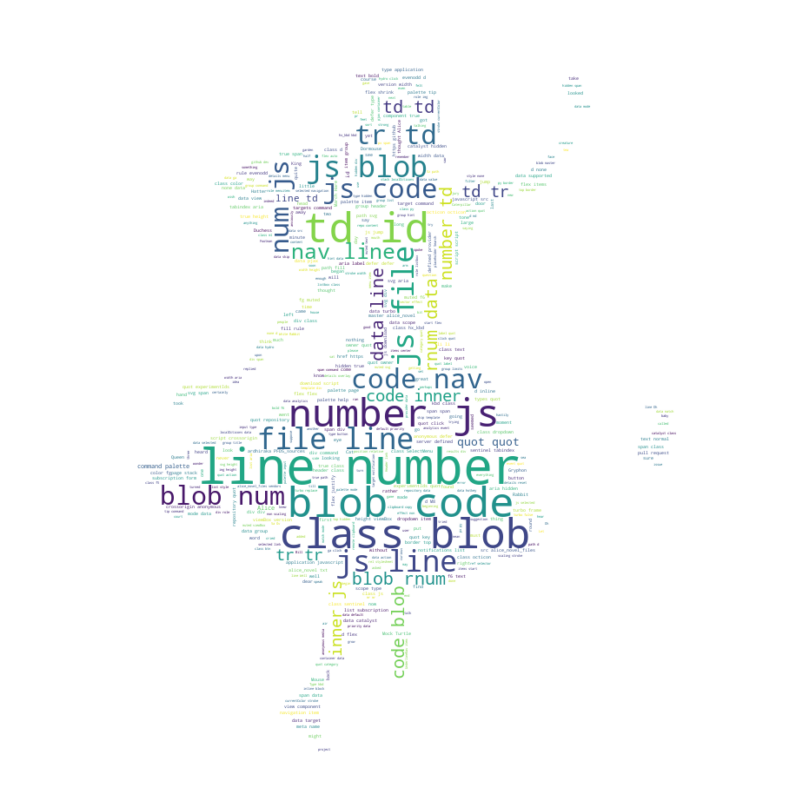

In [96]:
# Instnatiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# Generate the word cloud
alice_wc.generate(alice_novel)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # Set width
fig.set_figheight(18) # Set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [97]:
df_can.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [98]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [99]:
# Menggunakan countries dengan nama satu kata
# Menduplikasi nama tiap negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi

max_words = 90
word_string = ''

for country in df_can.index.values:
    # Check if country's name is a single-word name
    if (len(country.split(' ')) == 1):
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration) * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
    
# Display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [100]:
# Create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


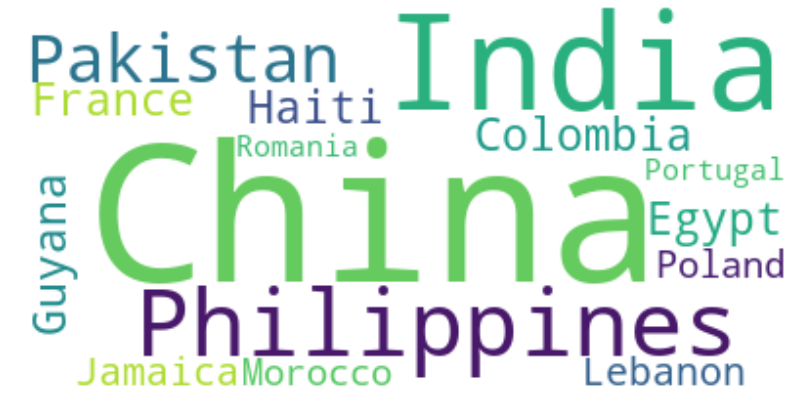

In [101]:
# Display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots 

In [102]:
# # Install seaborn
!pip install seaborn

# Import library
import seaborn as sns

print('Seaborn installed and imported')

Seaborn installed and imported


In [103]:
# Membuat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013

# We can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# Reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# Rename columns
df_tot.columns = ['year', 'total']

# View the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


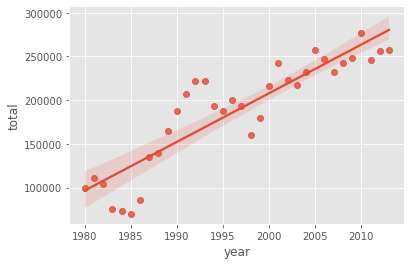

In [104]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

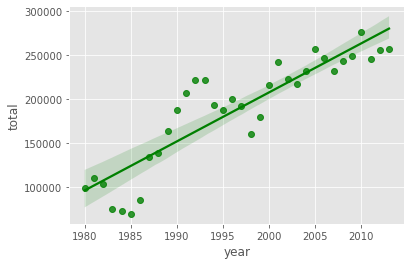

In [121]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

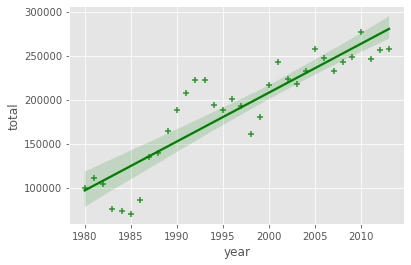

In [122]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

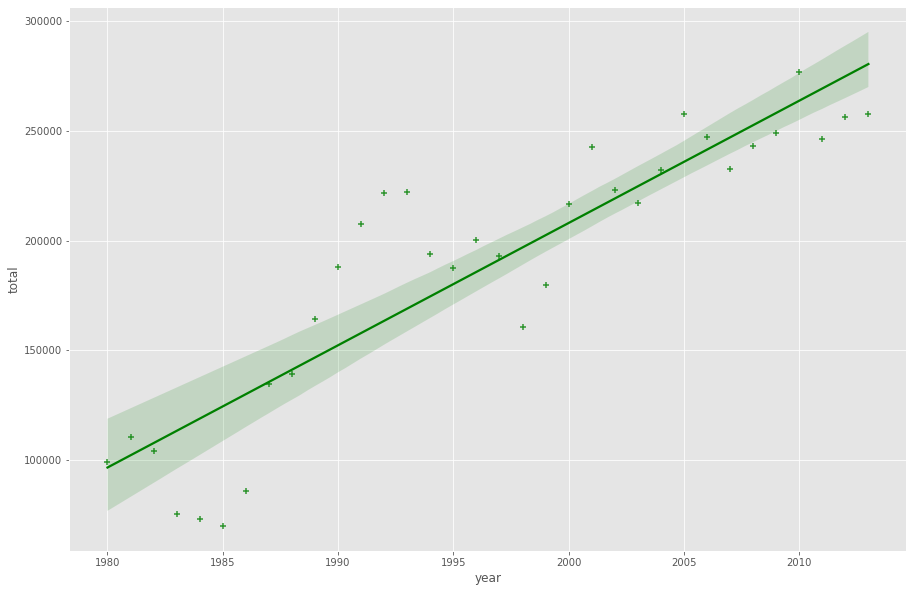

In [123]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

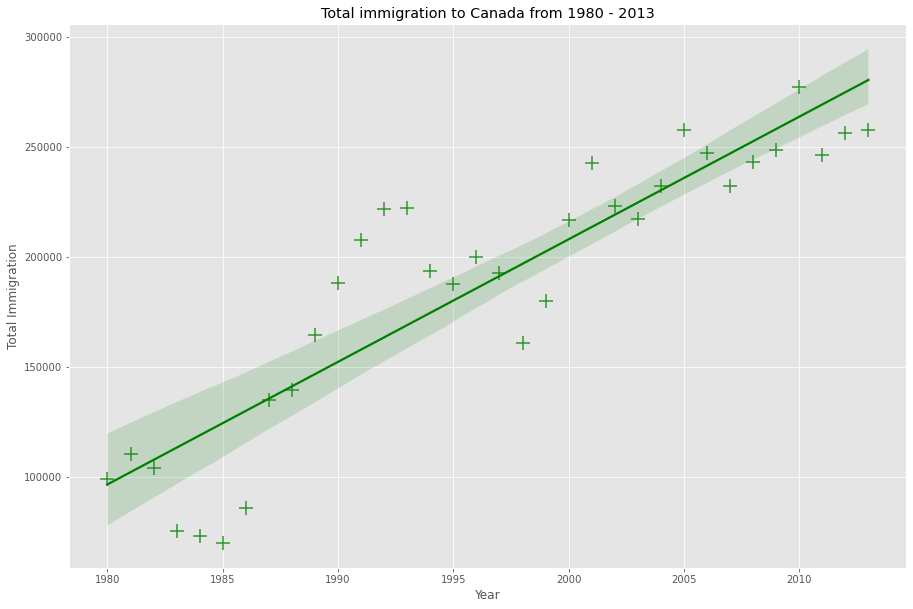

In [124]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

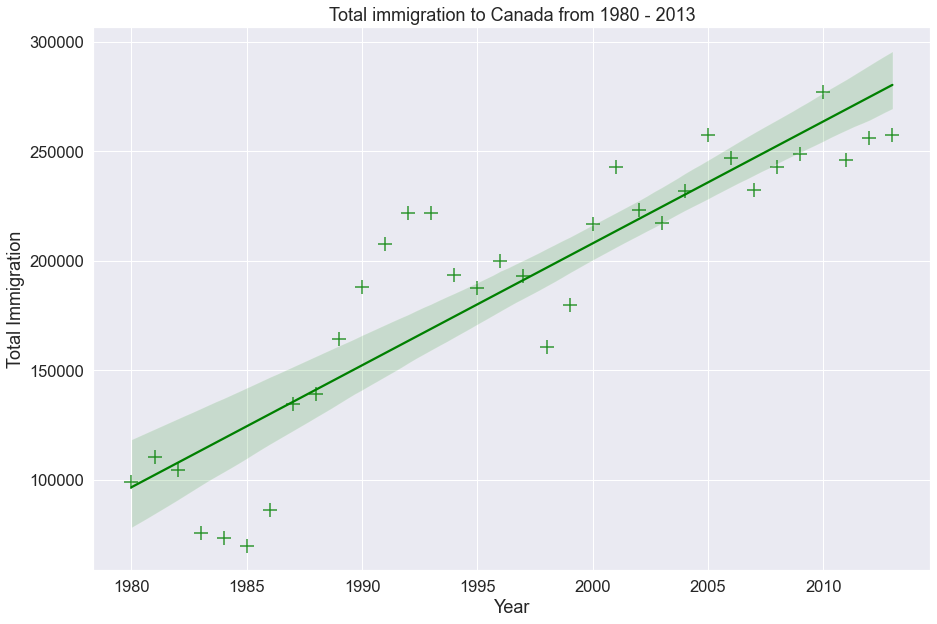

In [125]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

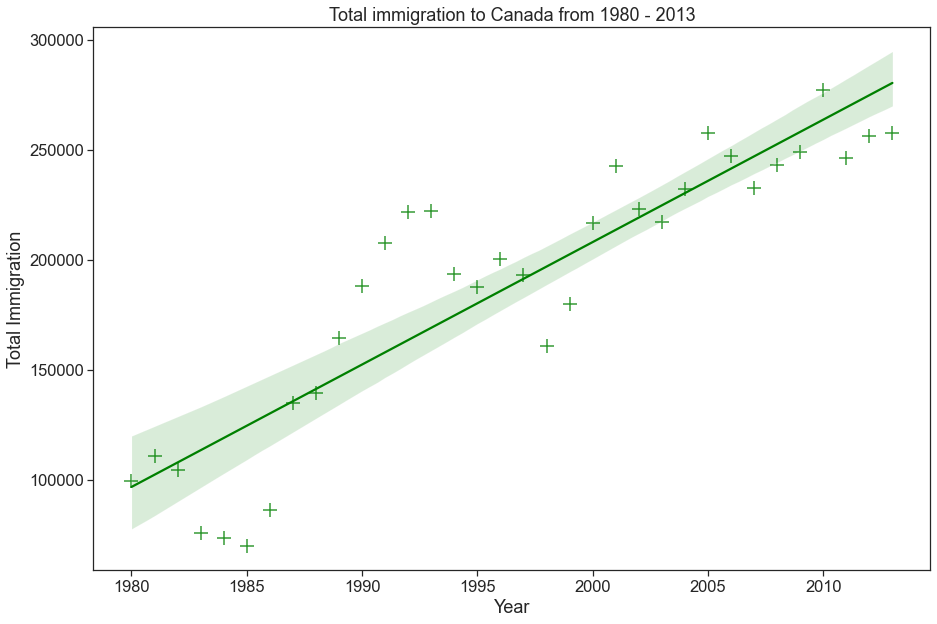

In [126]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration to Canada from 1980 - 2013')

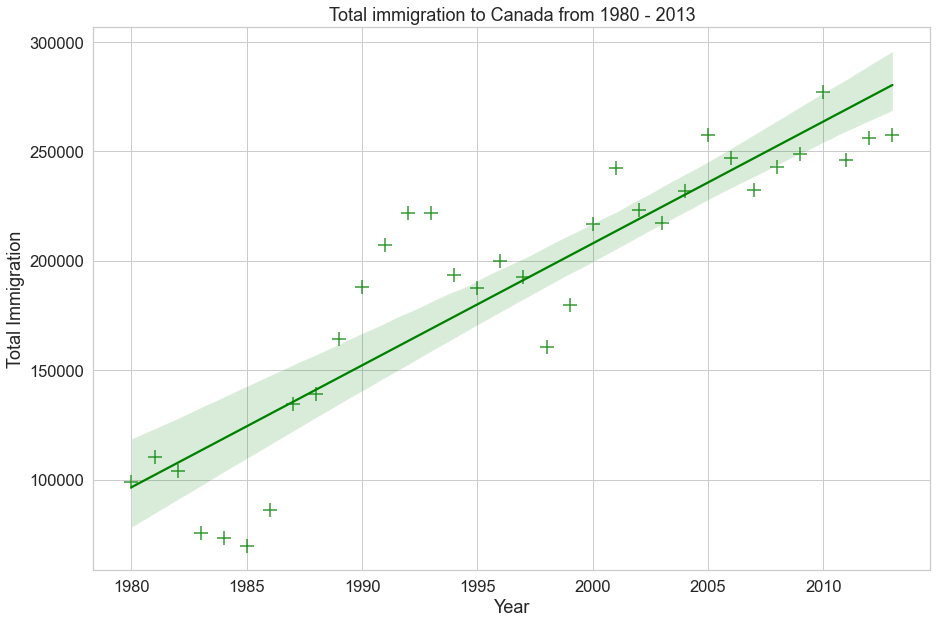

In [127]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

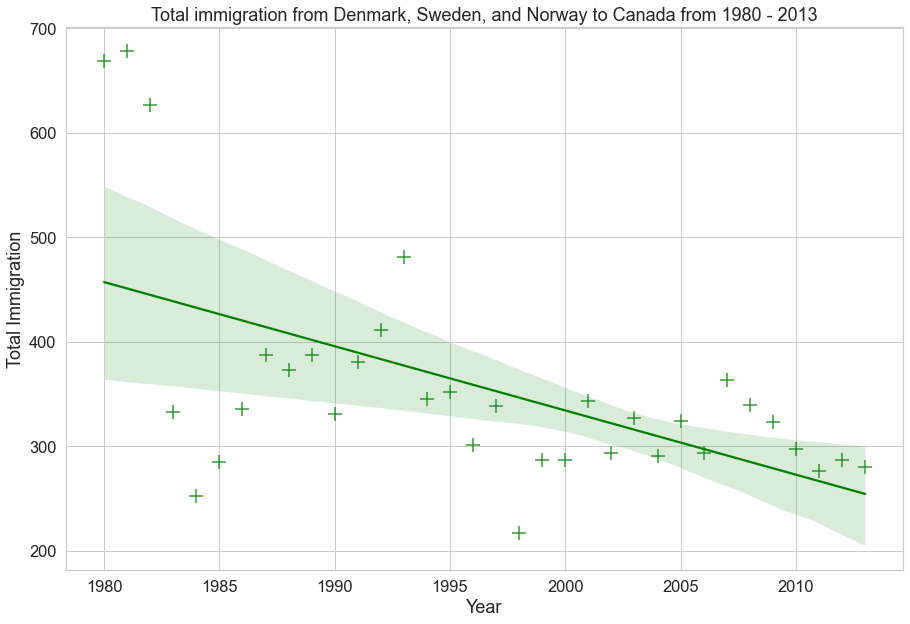

In [130]:
# Create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# Create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Reset index in place
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['year', 'total']

# Change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# Define figure size
plt.figure(figsize=(15, 10))

# Define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

# Sesi 8.2 - Advanced Visualization 2
Di section ini, kita akan mempelajari cara membuat peta untuk berbagai tujuan. Untuk melakukannya, kita akan berpisah dengan Matplotlib dan bekerja dengan pustaka visualisasi Python lain, yaitu Folium. Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium, di sisi lain, sepenuhnya gratis.

# Exploring Datasets with pandas and Matplotlib
Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. Perpustakaan plotting utama yang akan kita jelajahi di section ini adalah Folium.

Datasets:

Insiden Departemen Kepolisian San Francisco untuk tahun 2016 - Insiden Departemen Kepolisian dari portal data publik San Francisco. Insiden berasal dari sistem Pelaporan Insiden Kejahatan Departemen Kepolisian San Francisco (SFPD). Diperbarui setiap hari, menampilkan data sepanjang tahun 2016. Alamat dan lokasi telah dianonimkan dengan pindah ke blok tengah atau ke persimpangan.

Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

# Downloading and Prepping Data


In [131]:
import numpy as np
import pandas as pd 

# Introduction to Folium
Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat pustaka ini sangat berguna untuk pembuatan dasbor.

# Let's Install Folium
Folium tidak tersedia secara default. Jadi, kita harus menginstallnya terlebih dahulu sebelum dapat mengimpornya

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes

import folium

print('Folium installed and imported!')

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39ha

In [2]:
# Define the world map
world_map = folium.Map()

# Display world map
world_map

NameError: name 'folium' is not defined

In [ ]:
# Define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# Display world map
world_map

In [ ]:
# Define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# Display world map
world_map


In [ ]:
# Create a map of Hacktiv8 with a zoom level of 15
world_map = folium.Map(location=[-6.260489408354487, 106.78170740600946], zoom_start=15)

# Display world map
world_map

# Stamen Toner Maps
Stamen Toner adalah peta B + W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.


In [ ]:
# Create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Toner')

# Display map
world_map

# Stamen Terrain Maps
Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

In [ ]:
# Create a Stamen Terrain map of the world centered around Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Terrain')

# Display map
world_map

# Maps with Markers

In [ ]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe')

In [ ]:
df_incidents.head()

Setiap baris terdiri dari 13 fitur:

- IncidntNum: Incident Number
- Category: Category of crime or incident
- Descript: Desciption of the crime or incident
- DayOfWeek: The day of week on which the incident occurred
- Date: The date on which the incident occurred
- Time: The time of day on which the incident occurred
- PdDistrict: The police department district
- Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not.
- Address: The closest address to where the incident took place.
- X: The longitude value of the crime location
- Y: The latitude value of the crime location
- Location: A tuple of the latitude and the longitude values
- Pdld: The police department ID

In [ ]:
df_incidents.shape

In [ ]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [ ]:
# Create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
sanfran_map

Mari menaruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dan gayanya sendiri, lalu menambahkannya ke sanfran_map

In [ ]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # Defines how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
# Add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
e this Notebook Trusted to load map: File -> Trust Notebook
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # Defines how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
# Add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
# Ccreate map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)
    
# Show map
sanfran_map

Solusi lain adalah mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat dianalisis secara terpisah.

In [ ]:
from folium import plugins

# Let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# Loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(incidents)
    
# Display map
sanfran_map

# Choropleth Maps
Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberi cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah.

In [ ]:
!conda install -conda anaconda xlrd --yes

In [134]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

print('Data downloaded and read into a dataframe!')

FileNotFoundError: [Errno 2] No such file or directory: 'Canada.xlsx'

In [135]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [136]:
df_can.shape

(195, 38)

In [137]:
# Membersihkan dataset dengan menghilangkan kolom tidak penting
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Mengubah nama kolom sehingga lebih masuk akal
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)

# Guna konsistensi, membuat semua label kolom bertipe string
df_can.columns = list(map(str, df_can.columns))

# Menambahkan kolom 'Total'
df_can['Total'] = df_can.sum(axis = 1)

# Tahun yang akan kita gunakan pada sesi ini - berguna dalam plotting nanti
years = list(map(str, range(1980, 2014)))
print('Data dimensions: ', df_can.shape)

KeyError: "['AREA', 'REG', 'DEV', 'Type', 'Coverage'] not found in axis"

In [ ]:
df_can.head()

In [ ]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print('GeoJSON file downloaded!')

In [ ]:
world_geo = r'world_countries.json' # geojson file

# Create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# Generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# Display map
world_map